# Aprendizaje Supervisado Paso a Paso

Este notebook tiene como objetivo introducirte a los conceptos prácticos de aprendizaje supervisado. Veremos modelos simples de regresión y clasificación, evaluaremos su desempeño y analizaremos cómo detectar si un modelo se ajusta bien a los datos o no.

## Paso 1: Carga de librerías necesarias

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    ConfusionMatrixDisplay,
)

sns.set_theme(style="whitegrid")

## Parte I: Regresión

Utilizaremos el conjunto de datos de diabetes para predecir una variable continua relacionada con la salud del paciente.

In [2]:
# cargar conjunto de datos
diabetes = load_diabetes()

In [3]:
# Explorar el conjunto de datos
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

Noten el formato en que viene el conjunto de datos (Bunch, que es similar a los diccionarios)

Noten que las variables ya están escaladas (media 0, varianza 1)


In [4]:
diabetes_desc = diabetes.DESCR
print(diabetes_desc)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Ahora lo dividimos en X para las variables independientes y Y para la dependiente

In [5]:
# dividir datos
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [6]:
# Exploración inicial del dataset de diabetes
print("Dimensiones del dataset:", X.shape)
print("\nNombres de las columnas:", X.columns.to_list())

Dimensiones del dataset: (442, 10)

Nombres de las columnas: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [7]:
# Estadísticas descriptivas
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


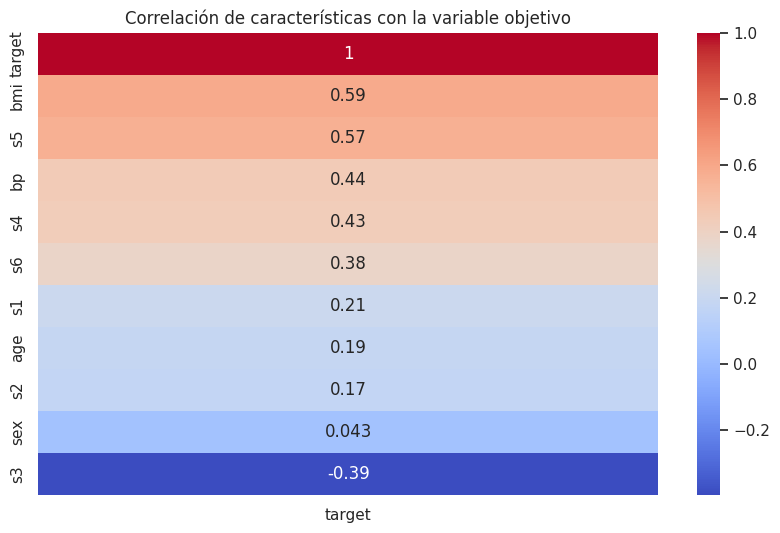

In [8]:
# visualizar correlaciones de X con Y
X_target = X.copy()
X_target["target"] = y

plt.figure(figsize=(10, 6))
sns.heatmap(
    X_target.corr()[["target"]].sort_values("target", ascending=False),
    annot=True,
    cmap="coolwarm",
)
plt.title("Correlación de características con la variable objetivo")
plt.show()

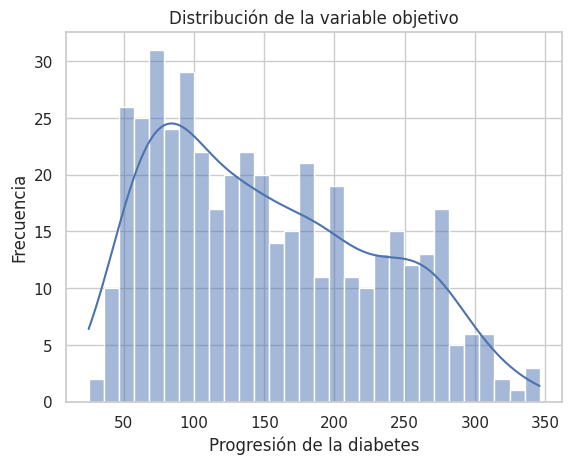

In [9]:
# Graficar distribución
sns.histplot(y, kde=True, bins=30)
plt.title("Distribución de la variable objetivo")
plt.xlabel("Progresión de la diabetes")
plt.ylabel("Frecuencia")
plt.show()

Esta variable objetivo es un  valor cuantitativo de la progresión de la enfermedad, de la cual no tenemos mayores detalles.

***¿Por qué importa esta distribución?***
**Modelado**: Al ser más o menos simétrica, es adecuada para regresión lineal sin necesidad de transformaciones logarítmicas.

**Detección de valores extremos**: No hay evidencia clara de outliers extremos, lo cual favorece modelos sensibles a ellos como regresión lineal.

**Interpretación clínica**: Los valores bajos o altos reflejan distintos niveles de progresión esperada de la diabetes.

In [10]:
# Dividir los datos de X y Y en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
# Crear modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
# Hacer predicciones y obtener métricas de desempeño
y_pred = lr.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 2827.084017424082
R2 Score: 0.43845439143447806


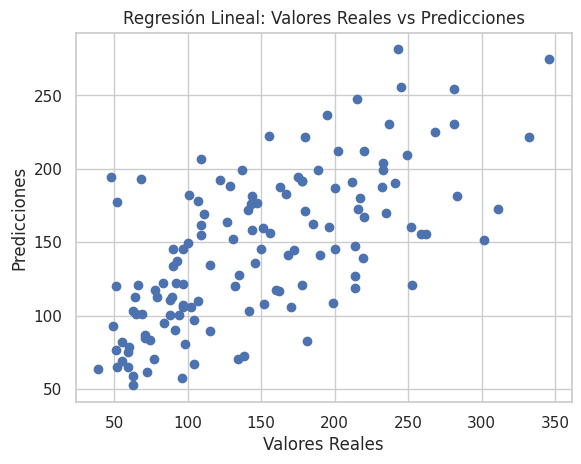

In [13]:
# graficar valores reales vs predichos
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores Reales vs Predicciones")
plt.show()

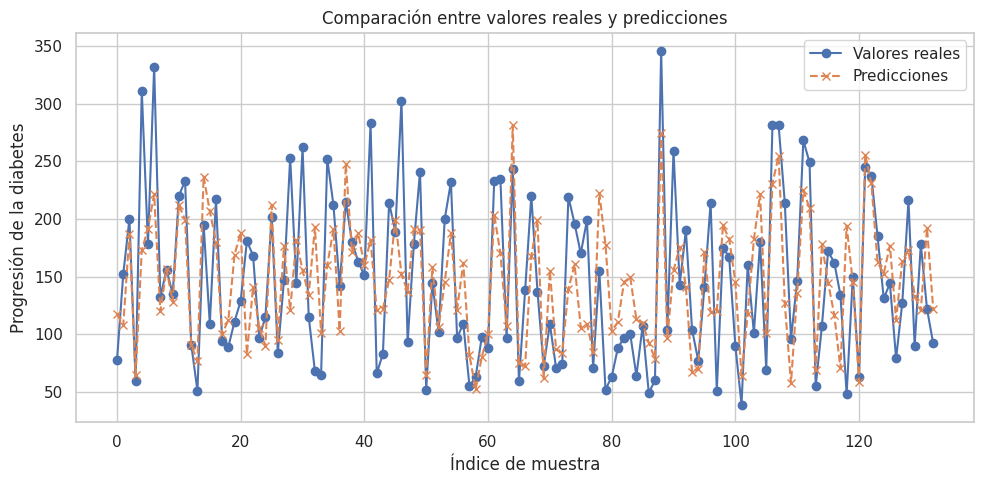

In [14]:
# Comparar valores reales vs predicciones por índice
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Valores reales", marker="o")
plt.plot(y_pred, label="Predicciones", marker="x", linestyle="--")
plt.title("Comparación entre valores reales y predicciones")
plt.xlabel("Índice de muestra")
plt.ylabel("Progresión de la diabetes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Es importante que al ser una regresión lineal, pero de varias variables independientes que se mezclan para dar un resultado en la variable dependiente, no es fácil ver una gráfica de la regresión.

Para hacernos una idea, vamos a graficar una regresión usando solo una de esas variables, esto no es lo que pasa al final, pero es una idea de que si se hace esto con todas y se mezclaran sería como se dan los valores finales

In [15]:
# Seleccionamos solo una característica para graficar en 2D
# Por ejemplo, el índice 2 ("bmi") que es bastante relevante
feature_index = 2
X_plot = X_test.iloc[:, feature_index].values.reshape(-1, 1)
X_plot_all = X.iloc[:, feature_index].values.reshape(-1, 1)

In [16]:
# Reentrenar modelo solo con esa variable para visualización
lr_simple = LinearRegression()
lr_simple.fit(X_train.iloc[:, feature_index].values.reshape(-1, 1), y_train)
y_pred_simple = lr_simple.predict(X_plot)

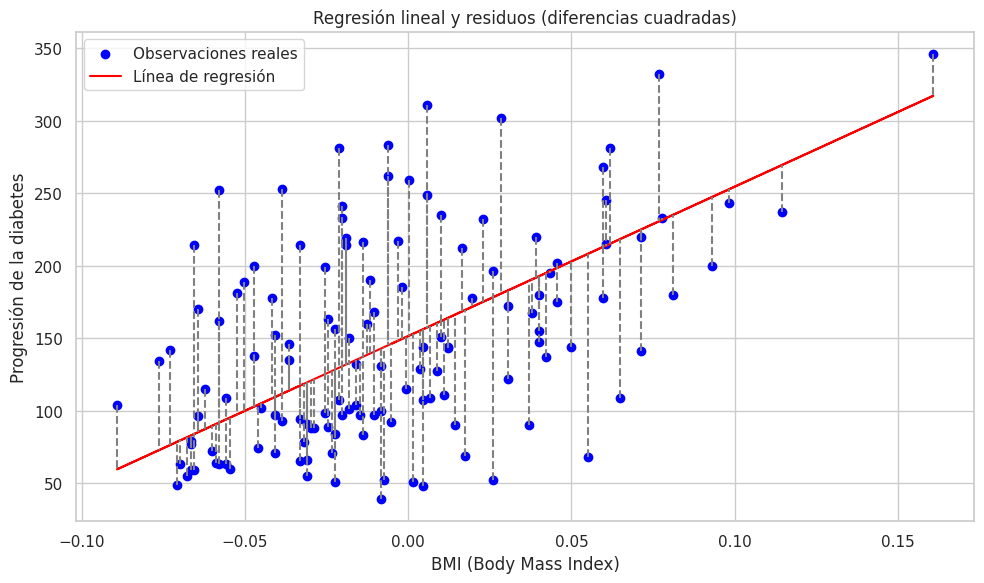

In [17]:
# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X_plot, y_test, color="blue", label="Observaciones reales")
plt.plot(X_plot, y_pred_simple, color="red", label="Línea de regresión")

# Agregar líneas verticales (residuos)
for i in range(len(X_plot)):
    plt.plot(
        [X_plot[i], X_plot[i]],
        [y_test[i], y_pred_simple[i]],
        color="gray",
        linestyle="--",
    )

plt.xlabel("BMI (Body Mass Index)")
plt.ylabel("Progresión de la diabetes")
plt.title("Regresión lineal y residuos (diferencias cuadradas)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Transformaciones
Vean como si con una sola variable, se hace una transformación no lineal sobre los datos se pueden capturar relaciones no lineales

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [19]:
# Usar solo la variable 'bmi'
X_bmi = X[["bmi"]].values
X_train, X_test, y_train, y_test = train_test_split(
    X_bmi, y, test_size=0.3, random_state=1
)

In [20]:
# Modelo polinomial de grado 3
model = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False), LinearRegression()
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
# Evaluación
# OJO que esto es sobre una sola variable, por eso el resultado no va a ser bueno
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

MSE: 4193.97
R²: 0.1669


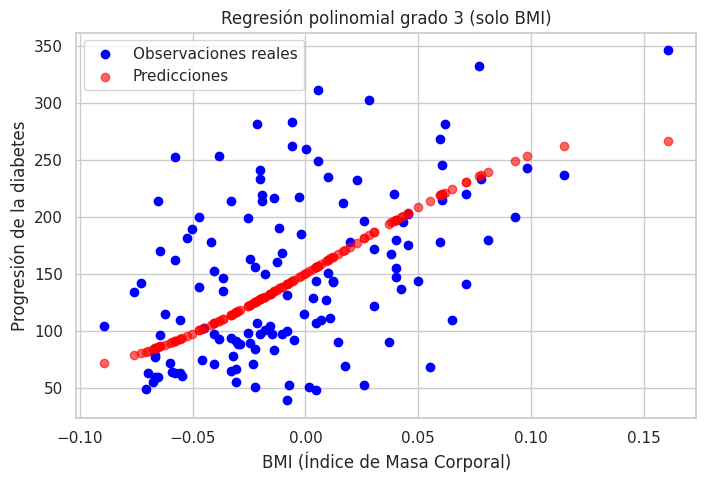

In [22]:
# Visualización
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Observaciones reales")
plt.scatter(X_test, y_pred, color="red", label="Predicciones", alpha=0.6)
plt.xlabel("BMI (Índice de Masa Corporal)")
plt.ylabel("Progresión de la diabetes")
plt.title("Regresión polinomial grado 3 (solo BMI)")
plt.legend()
plt.grid(True)
plt.show()

Noten ya que la predicción tiene ligeras curvas

## Parte II: Clasificación

Ahora usaremos un modelo de clasificación para predecir si un tumor es benigno o maligno usando el dataset de cáncer de mama.

In [23]:
# Cargar conjunto de datos
data = load_breast_cancer()
# dividir variables independientes y dependientes
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
# Dividir el dataset en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
# Hacer un dataframe para explorar los datos
y1 = pd.Series(data.target, name="target")

df = X.copy()
df["target"] = y1.map({0: "Maligno", 1: "Benigno"})

In [25]:
# Mostrar dimensiones y tipos
print("Dimensiones del dataset:", df.shape)
print("Clases:", df["target"].value_counts())

Dimensiones del dataset: (569, 31)
Clases: target
Benigno    357
Maligno    212
Name: count, dtype: int64


In [36]:
# Estadísticas generales
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target_numeric
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


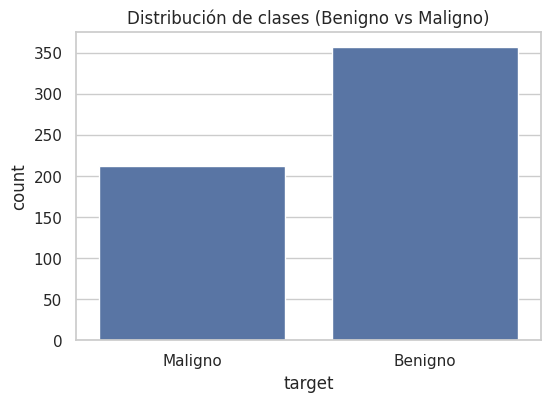

In [27]:
# Visualización de clases
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="target")
plt.title("Distribución de clases (Benigno vs Maligno)")
plt.show()

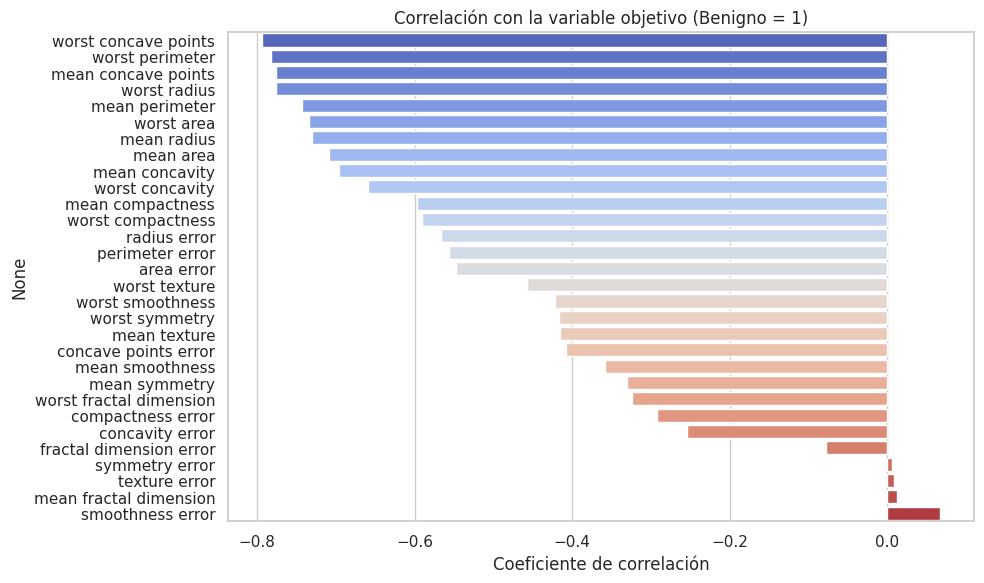

In [39]:
# Correlación con la variable objetivo
plt.figure(figsize=(10, 6))
# volver a una target numérica para la correlacion
df["target_numeric"] = df["target"].map({"Maligno": 0, "Benigno": 1})
corr = df.corr(numeric_only=True)["target_numeric"].drop("target_numeric").sort_values()
sns.barplot(
    x=corr.values, y=corr.index, hue=corr.index, legend=False, palette="coolwarm"
)
plt.title("Correlación con la variable objetivo (Benigno = 1)")
plt.xlabel("Coeficiente de correlación")
plt.tight_layout()
plt.show()

In [29]:
# Crear una regresión logística
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [30]:
# Obtener alguans medidas de eficacia
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9473684210526315
F1 Score: 0.958904109589041


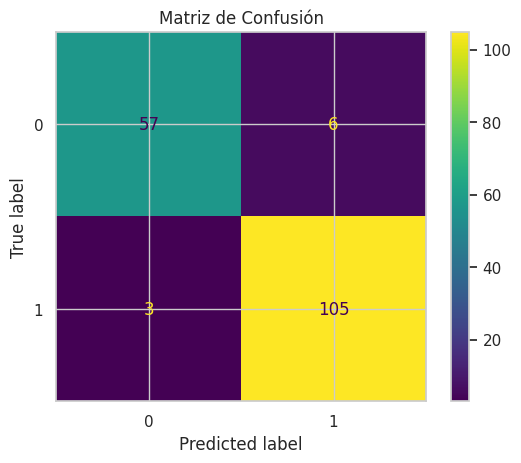

In [ ]:
# graciar matriz de confusión
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.title("Matriz de Confusión")
plt.show()

**Ejercicio**
Implementa algunas otras métricas para evaluar el modelo.

In [42]:
print("Precision :", precision_score(y_pred, y_test))
print("recall :", recall_score(y_pred, y_test))

Precision : 0.9722222222222222
recall : 0.9459459459459459


In [43]:
another_model = DecisionTreeClassifier(max_leaf_nodes=100)

In [44]:
another_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=100)

In [53]:
test_preds = another_model.predict(X_test)
train_preds = another_model.predict(X_train)

Test Accuracy: 0.9298245614035088
Test F1 Score: 0.9454545454545454
Test Precision : 0.9285714285714286
Test recall : 0.9629629629629629
Train Accuracy: 1.0
Train F1 Score: 1.0
Train Precision : 1.0
Train recall : 1.0


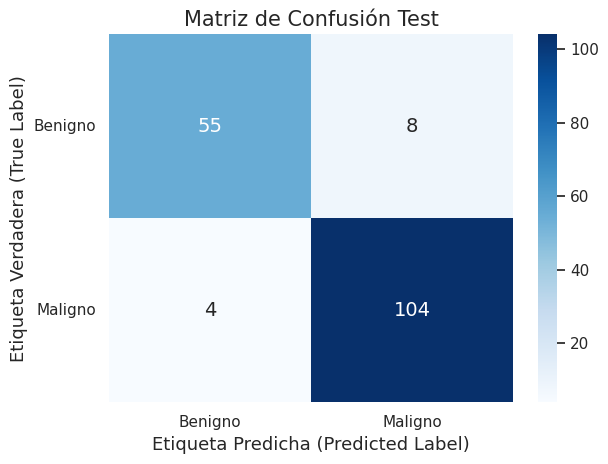

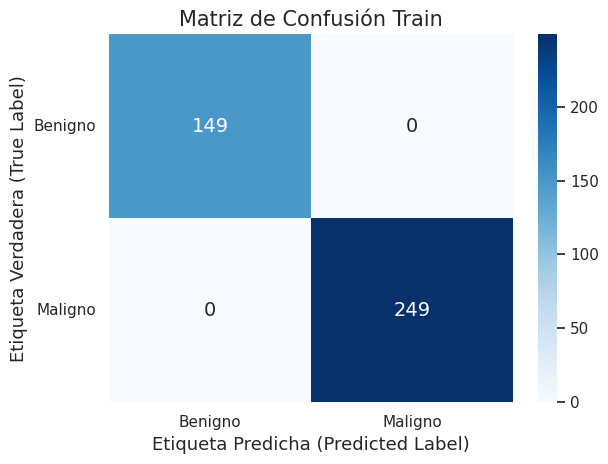

In [54]:
print("Test Accuracy:", accuracy_score(y_test, test_preds))
print("Test F1 Score:", f1_score(y_test, test_preds))
print("Test Precision :", precision_score(y_test, test_preds))
print("Test recall :", recall_score(y_test, test_preds))

print("Train Accuracy:", accuracy_score(y_train, train_preds))
print("Train F1 Score:", f1_score(y_train, train_preds))
print("Train Precision :", precision_score(y_train, train_preds))
print("Train recall :", recall_score(y_train, train_preds))


cm_test = confusion_matrix(y_test, test_preds)
cm_train = confusion_matrix(y_train, train_preds)
class_names = ["Benigno", "Maligno"]

def plot_confusion_matrix(cm: np.ndarray, classes: list[str], label:str) -> None:
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=classes,
        yticklabels=classes,
        cbar=True,
        annot_kws={"size": 14},
    )

    plt.ylabel("Etiqueta Verdadera (True Label)", fontsize=13)
    plt.xlabel("Etiqueta Predicha (Predicted Label)", fontsize=13)
    plt.title(f"Matriz de Confusión {label}", fontsize=15)
    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.show()


plot_confusion_matrix(cm=cm_test, classes=class_names, label="Test")

plot_confusion_matrix(cm=cm_train, classes=class_names, label="Train")

Recordemos que recall es la proporción de verdaderos positivos sobre la suma de verdaderos positivos y falsos negativos. Es decir, de todos los casos positivos, ¿cuántos fueron correctamente identificados?
Por su parte, precision es la proporción de verdaderos positivos sobre la suma de verdaderos positivos y falsos positivos. Es decir, de todos los casos que el modelo predijo como positivos, ¿cuántos eran realmente positivos?

¿Qué variables influyen más o menos en el modelo?
Veamos los coeficientes

In [32]:
# Coeficientes y variables
coefs = clf.coef_[0]  # Solo una clase (binaria)
features = X.columns

In [33]:
coefs

array([ 0.35319817,  0.18252333, -0.3735076 ,  0.03698299, -0.09188656,
       -0.10313835, -0.28235579, -0.16555819, -0.17458463, -0.00511993,
       -0.04114518,  0.37574187,  0.30249156, -0.07776435, -0.02164963,
        0.04335593, -0.03099745, -0.03048597, -0.01014786,  0.01049015,
       -0.16900738, -0.36349031, -0.16774006, -0.00917398, -0.21084266,
       -0.4087164 , -0.78852615, -0.38941508, -0.32158804, -0.0311181 ])

In [34]:
# Crear dataframe ordenado
coef_df = pd.DataFrame({"Variable": features, "Coeficiente": coefs})
coef_df["Impacto"] = np.where(
    coef_df["Coeficiente"] > 0, "Aumenta probabilidad", "Disminuye probabilidad"
)
coef_df = coef_df.sort_values(by="Coeficiente", ascending=False)

In [35]:
# ver coeficientes ordenados
display(coef_df)

,Variable,Coeficiente,Impacto
11,texture error,0.375742,Aumenta probabilidad
0,mean radius,0.353198,Aumenta probabilidad
12,perimeter error,0.302492,Aumenta probabilidad
1,mean texture,0.182523,Aumenta probabilidad
15,compactness error,0.043356,Aumenta probabilidad
3,mean area,0.036983,Aumenta probabilidad
19,fractal dimension error,0.010490,Aumenta probabilidad
9,mean fractal dimension,-0.005120,Disminuye probabilidad
23,worst area,-0.009174,Disminuye probabilidad
18,symmetry error,-0.010148,Disminuye probabilidad


## Tarea

1. Explica los parámetros de este código: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


R/ X es el conjunto de características, y es el conjunto de etiquetas, test_size es el porcentaje de datos que se usarán para la prueba y random_state es una semilla para asegurar que los resultados sean reproducibles.


2. Explica el parámetro max_iter de la regresión logística


R/ max_iter es el número máximo de iteraciones que el algoritmo de optimización realizará para encontrar los coeficientes del modelo. Si no converge antes de alcanzar este número, se detendrá y devolverá el resultado actual. Un valor más alto puede ayudar a mejorar la convergencia, pero también aumentará el tiempo de cómputo.

3. ¿Qué métricas usaste para evaluar tu modelo de clasificación y cuál tuvo mejor desempeño?


R/ Usé la precisión, el recall y la puntuación F1, y exactitud. El modelo es un árbol de decisión y tuvo un desempeño aceptable. Tuvo un Recall bastante alto, mejor que el Logistic Regression, pero las demás métricas fueron más bajas.

4. ¿Qué comportamiento evidenciaste que indica sobreajuste o poco ajuste? ¿En qué modelo?

R/ Algo que podría sugerir sobreajuste en el model del árbol de decisión es que es que las métricas sobre el conjunto de entrenamiento son 1 para todas, mientras que en el conjunto de prueba son más bajas. Esto sugiere que el modelo se ha ajustado demasiado a los datos de entrenamiento y no generaliza tan bien.

5. Da una conclusión general sobre cuándo un modelo se ajusta “bien” a los datos.

R/ Un modelo se ajusta bien a los datos cuando tiene un buen desempeño tanto en el conjunto de entrenamiento como en el de prueba. Esto significa que el modelo es capaz de capturar las relaciones subyacentes en los datos sin sobreajustarse a ellos.